**Importing required Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Flatten
from keras.models import Model

In [3]:
from keras.datasets import mnist

In [4]:
from keras.optimizers import SGD,Adagrad,Adam,RMSprop

# **Load the Data**

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Check the size of the training and test data set
print("Train input data Set: ", X_train.shape)
print("Train label data Set: ", y_train.shape)
print("test input data Set: ", X_test.shape)
print("test output data Set: ", y_test.shape)

Train input data Set:  (60000, 28, 28)
Train label data Set:  (60000,)
test input data Set:  (10000, 28, 28)
test output data Set:  (10000,)


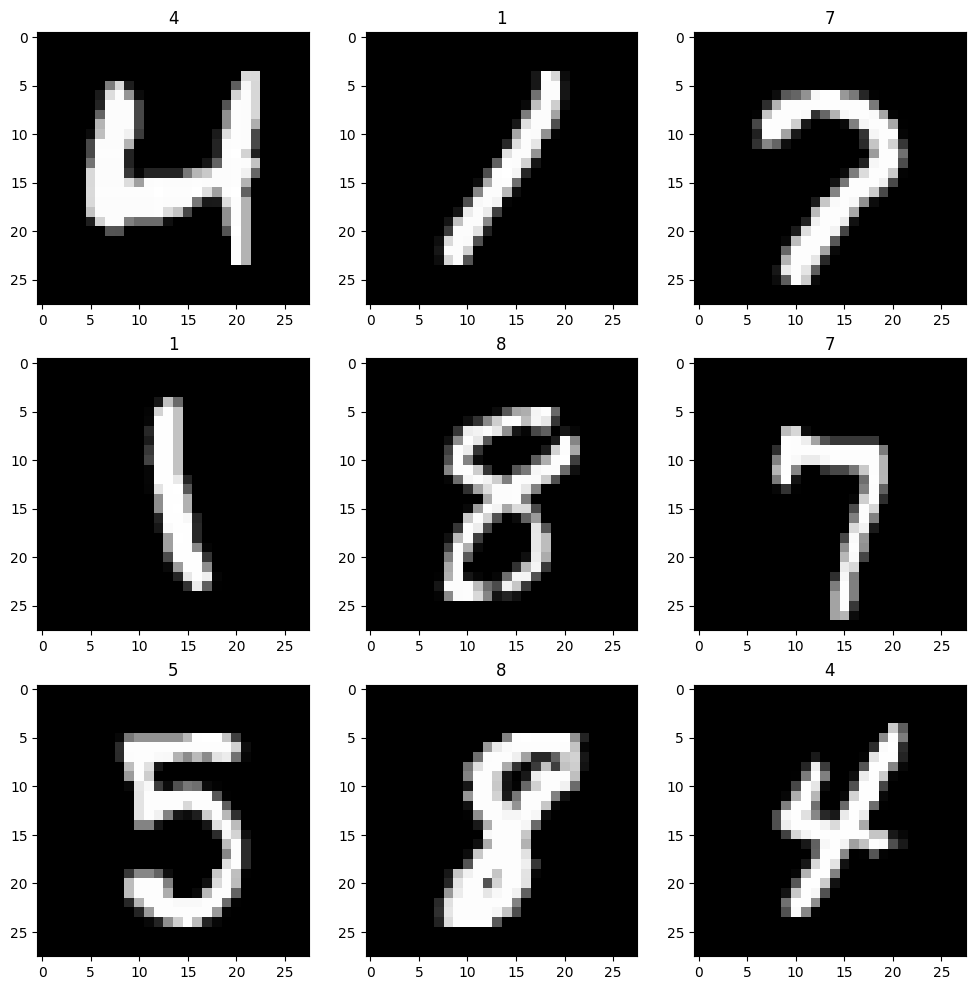

In [7]:
plt.figure(figsize=(12,12))
np.random.seed(0)
idx = np.random.randint(0,60000,9)

for i in range(len(idx)):
  plt.subplot(3,3,i+1)
  plt.title(y_train[idx[i]])
  grid_data = np.reshape(X_train[idx[i]],(28,28))
  plt.imshow(grid_data, cmap = 'gray')

# **Data Preprocessing**

In [8]:
# type conversion of columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalization
X_train = X_train/255
X_test = X_test / 255

# Adding the channel to specify it is a black and white image
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
#Here we are having a class number for each image
print("Class label for the first image:",y_train[0])

# Lets convert this into a 10 dimentional vector
# e.g. consider an image with class label 5 -> convert it to=>[0,0,0,0,,0,1,0,0,0,0]
# this conversion id needed for MLPs

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print("After converting the output into a vector: ",y_train[0])

Class label for the first image: 5
After converting the output into a vector:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(X_train,X_train,test_size = 0.2,random_state= 13)

# **Build the model - Experiment SGD(Without Momentum)**

In [15]:
from os import name
# Encoder
encoder_input = keras.Input(shape = (28,28,1),name = 'img')
x = keras.layers.Flatten()(encoder_input) # after flattening (28,28,1) -> 784 pixels per timestep
# API way of building the model
# Each pixel will go as input in each time step
encoder_output  = keras.layers.Dense(64,activation='relu')(x) # compress to latent space : 784-> 64(bottleneck)

encoder = keras.Model(encoder_input,encoder_output,name = 'encoder')

# decoder
decoder_input = keras.layers.Dense(64,activation='relu')(encoder_output)
x = keras.layers.Dense(784,activation='relu')(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(x)

# Autoencoder
autoencoder = keras.Model(encoder_input,decoder_output,name = 'autoencoder')

autoencoder.summary()

# Compile the model
autoencoder.compile(loss = 'mean_squared_error', optimizer=SGD())

# fit the model
autoencoder_train = autoencoder.fit(train_X,train_ground,batch_size=128,epochs=50,
                                    validation_data=(valid_X,valid_ground))



Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1055 - val_loss: 0.1046
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1038 - val_loss: 0.1026
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1016 - val_loss: 0.1002
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0991 - val_loss: 0.0975
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0965 - val_loss: 0.0945
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0936 - val_loss: 0.0915
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0906 - val_loss: 0.0885
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0875 - val_loss: 0.0857
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0847 - val_loss: 0.0831
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0824 - val_loss: 0.0810
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0804 - val_loss: 0.0792
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

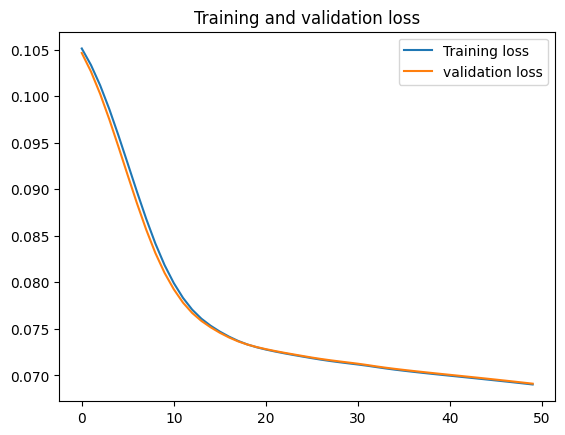

In [16]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss,label = 'Training loss')
plt.plot(epochs,val_loss, label = 'validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test original images
compressed images
Reconstructed Test images


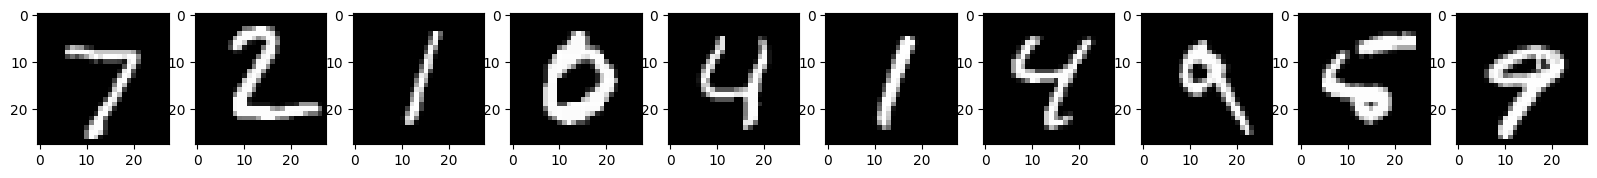

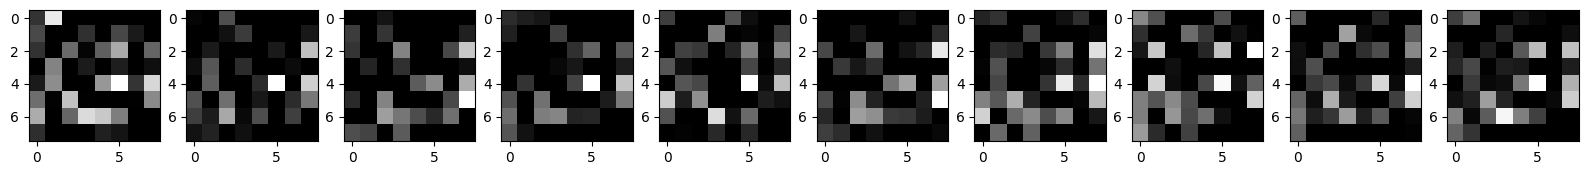

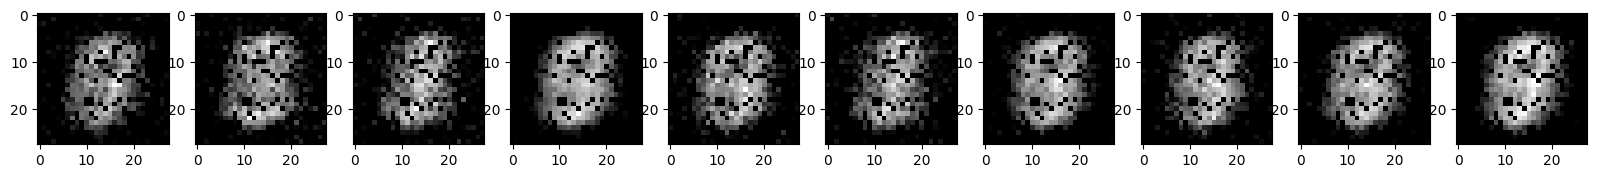

In [19]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20,4))
print("Test original images")
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(X_test[i].reshape((28,28)),cmap = 'gray')


plt.figure(figsize=(20,4))
print("compressed images")
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(comp[i].reshape((8,8)),cmap = 'gray')


plt.figure(figsize=(20,4))
print("Reconstructed Test images")
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.imshow(pred[i].reshape((28,28)),cmap = 'gray')


# **Build the model - Experiment SGD(With Momentum)**

In [20]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

#compile the model
autoencoder.compile(loss='mean_squared_error', optimizer = SGD(momentum=0.9))

#fit the model
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground))

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1030 - val_loss: 0.0862
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0821 - val_loss: 0.0765
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0757 - val_loss: 0.0744
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0738 - val_loss: 0.0733
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0727 - val_loss: 0.0721
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0718 - val_loss: 0.0711
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0705 - val_loss: 0.0699
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0694 - val_loss: 0.0681
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0676 - val_loss: 0.0665
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0660 - val_loss: 0.0650
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0642 - val_loss: 0.0628
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

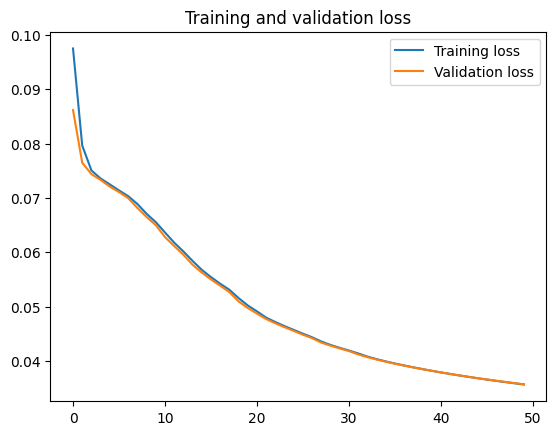

In [22]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Images


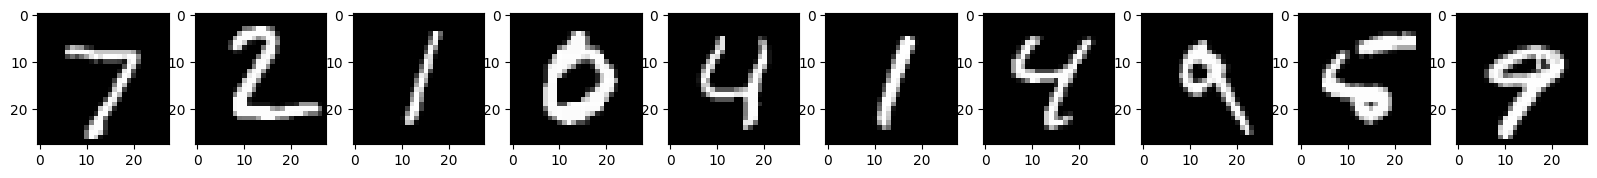

Compressed Image


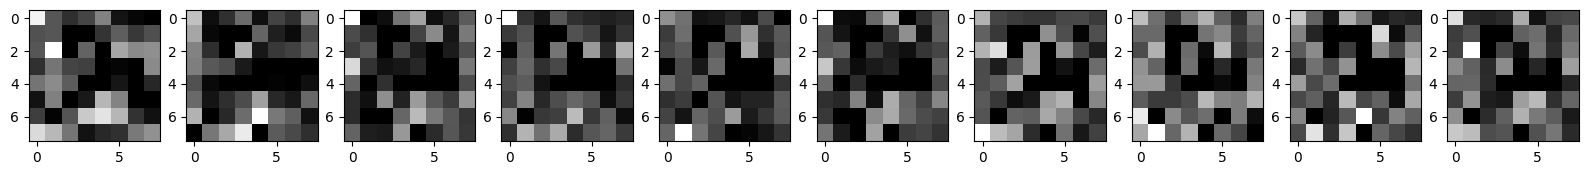

Reconstruction of Test Images


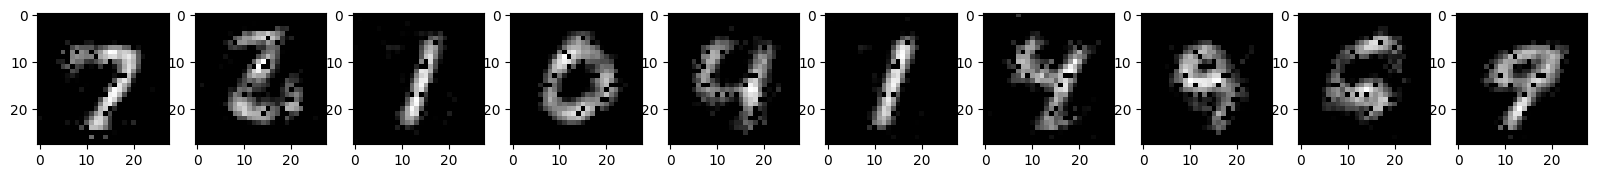

In [23]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((28, 28)), cmap='gray')
plt.show()

# **Build the model - Experiment RMSProp**

In [24]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

#compile the model
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

#fit the model
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground))

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0735 - val_loss: 0.0439
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0408 - val_loss: 0.0347
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0328 - val_loss: 0.0294
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0284 - val_loss: 0.0262
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0257 - val_loss: 0.0247
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0238 - val_loss: 0.0227
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0223 - val_loss: 0.0224
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0214 - val_loss: 0.0208
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0205 - val_loss: 0.0200
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0196 - val_loss: 0.0196
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0192 - val_loss: 0.0187
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

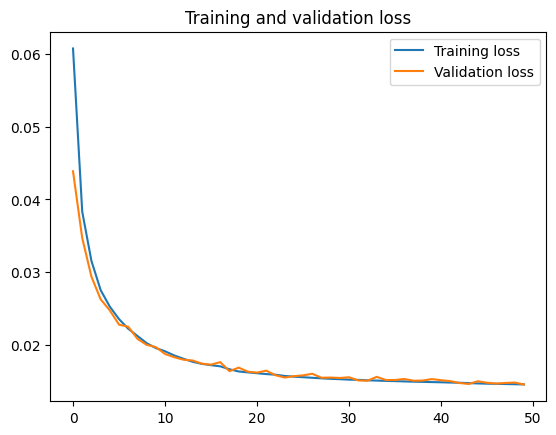

In [25]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Images


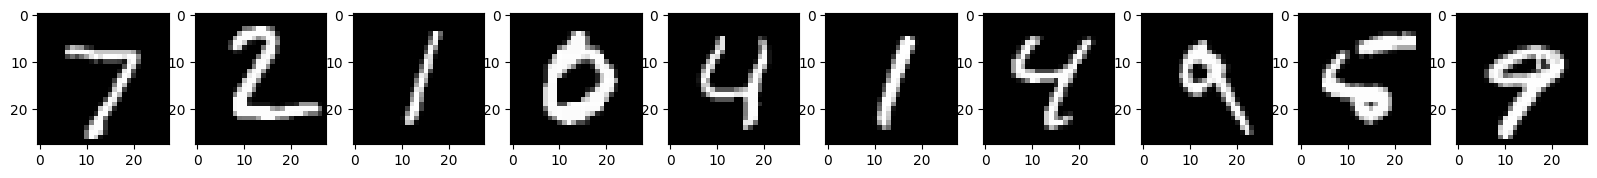

Compressed Image


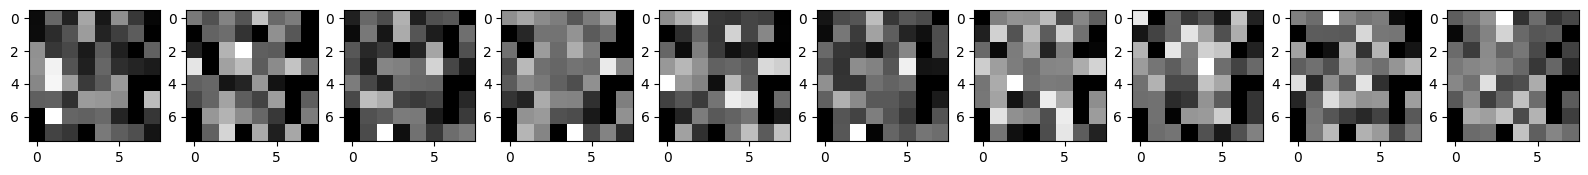

Reconstruction of Test Images


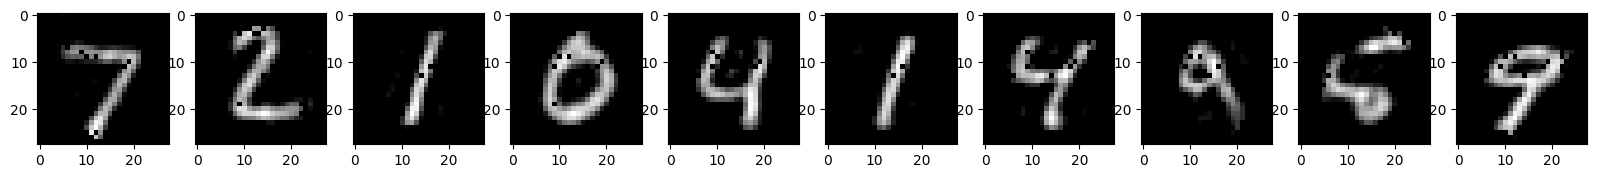

In [26]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((28, 28)), cmap='gray')
plt.show()

# **Build the model - Experiment Adam**

In [27]:
#Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

#autoencoder
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

autoencoder.summary()

#compile the model
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())

#fit the model
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128, epochs=50, validation_data=(valid_X, valid_ground))

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0474 - val_loss: 0.0164
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0153 - val_loss: 0.0135
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

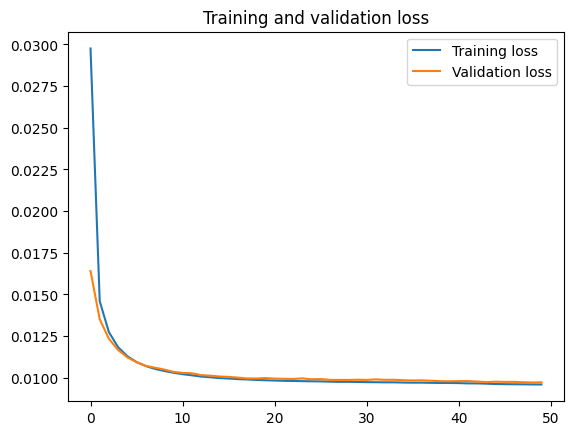

In [28]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Images


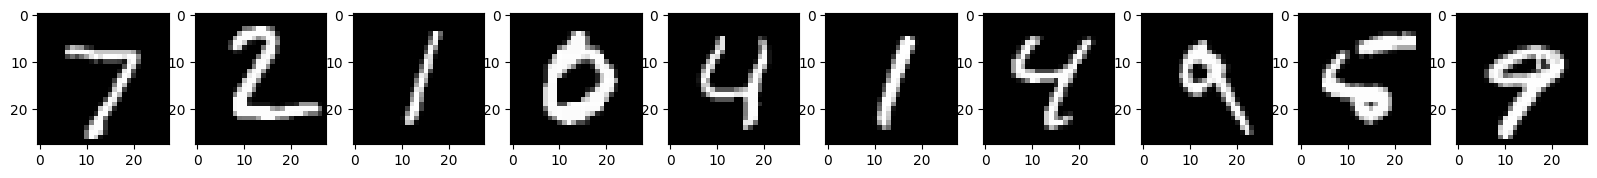

Compressed Image


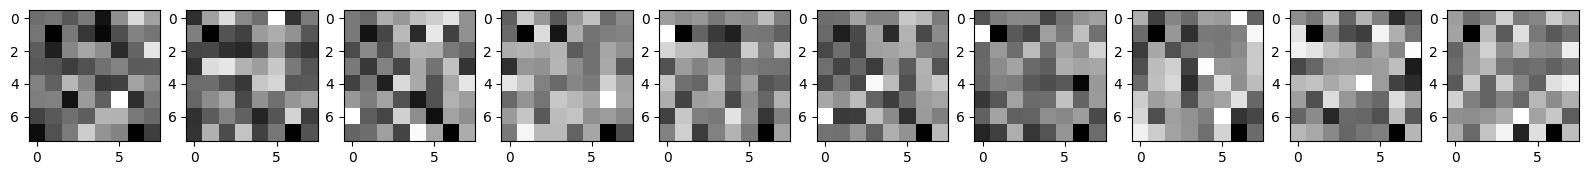

Reconstruction of Test Images


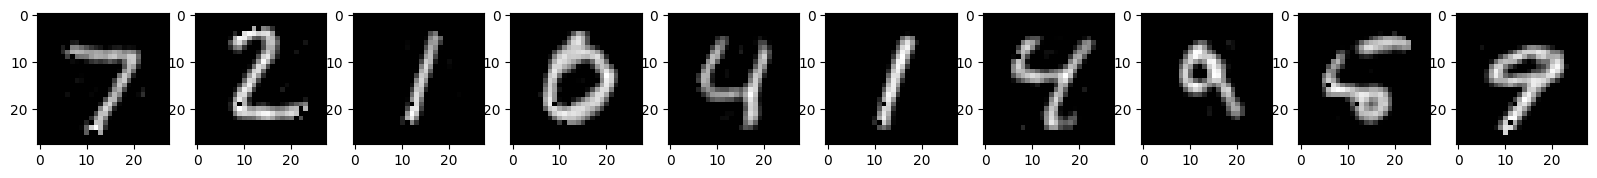

In [29]:
comp = encoder.predict(X_test)
pred = autoencoder.predict(X_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Compressed Image")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(comp[i].reshape((8, 8)), cmap='gray')
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape((28, 28)), cmap='gray')
plt.show()